Mumbai: 29.99°C, 73%, light rain
Delhi: 44.43°C, 8%, clear sky
Chennai: 35.27°C, 63%, broken clouds
Kolkata: 37.27°C, 38%, scattered clouds
Bengaluru: 30.2°C, 60%, overcast clouds
Hyderabad: 36.74°C, 29%, overcast clouds
Bihar: 12.28°C, 54%, overcast clouds


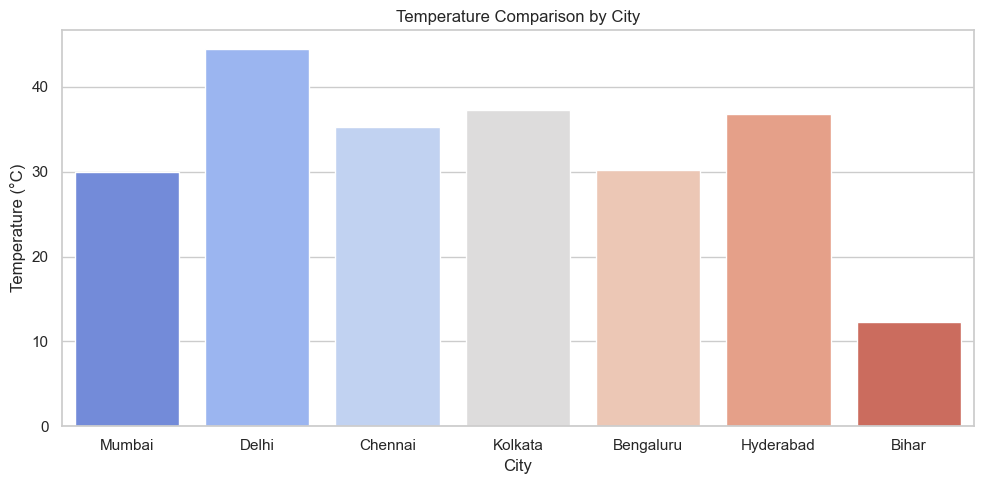

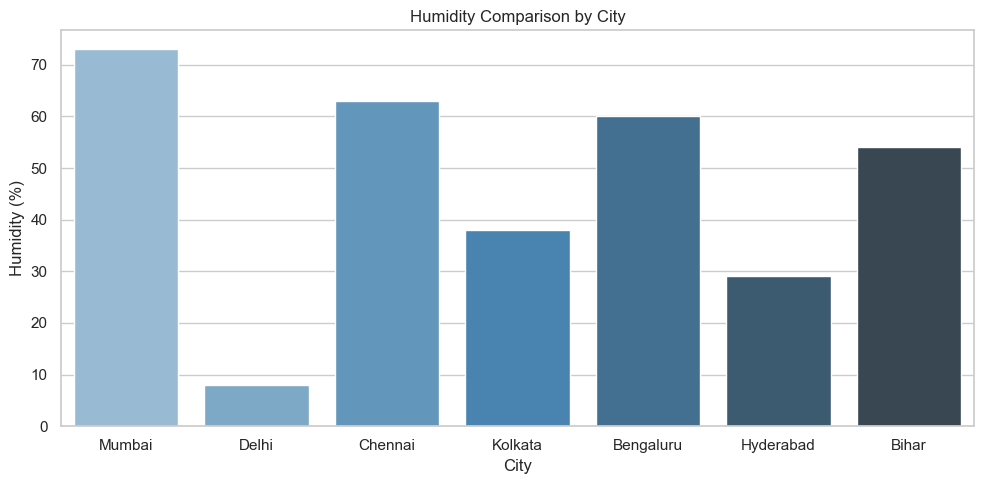

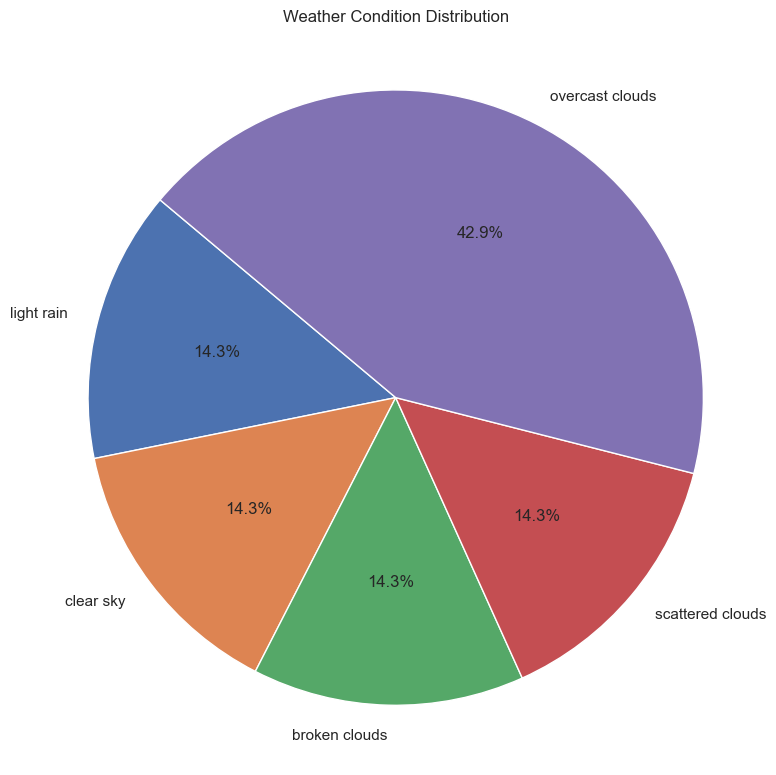

In [16]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# ✅ Your valid OpenWeatherMap API key
API_KEY = 'd6a81f4ebfefd07bc44bb8cd010200b5'

cities = ['Mumbai', 'Delhi', 'Chennai', 'Kolkata', 'Bengaluru', 'Hyderabad', 'Bihar']
temperatures = []
humidities = []
weather_conditions = []

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url)
    data = response.json()

    if response.status_code == 200:
        temp = data['main']['temp']
        humidity = data['main']['humidity']
        weather = data['weather'][0]['description']

        temperatures.append(temp)
        humidities.append(humidity)
        weather_conditions.append(weather)

        print(f"{city}: {temp}°C, {humidity}%, {weather}")
    else:
        print(f"Failed to get data for {city}: {data.get('message', 'Unknown error')}")
        temperatures.append(np.nan)
        humidities.append(np.nan)
        weather_conditions.append("N/A")

# ✅ Fix for font issue on some systems
plt.rcParams['font.family'] = 'DejaVu Sans'

sns.set(style="whitegrid")

# ✅ Plot temperature
plt.figure(figsize=(10, 5))
sns.barplot(x=cities, y=temperatures, hue=cities, palette="coolwarm", legend=False)
plt.title('Temperature Comparison by City')
plt.ylabel('Temperature (°C)')
plt.xlabel('City')
plt.tight_layout()
plt.show()

# ✅ Plot humidity
plt.figure(figsize=(10, 5))
sns.barplot(x=cities, y=humidities, hue=cities, palette="Blues_d", legend=False)
plt.title('Humidity Comparison by City')
plt.ylabel('Humidity (%)')
plt.xlabel('City')
plt.tight_layout()
plt.show()

# ✅ Weather condition pie chart
condition_counts = Counter(weather_conditions)
plt.figure(figsize=(8, 8))
plt.pie(condition_counts.values(), labels=condition_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Weather Condition Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()
